In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

In [2]:
CHART_NAME = 'seabornTest'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

In [3]:
filename = '/Users/seohuiwon/Desktop/School/2023/pythonpratice/DataVisualization/mpg.csv'
plt.style.use('ggplot') # 'ggplot' 형식의 스타일을 사용합니다.
# plt.style.use('Solarize_Light2')

In [4]:
mpg = pd.read_csv(filename, encoding='utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [7]:
xdata = mpg.loc[:, ['displ']]
ydata = mpg.loc[:, ['hwy']]

In [8]:
print(xdata)

     displ
0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
..     ...
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6

[234 rows x 1 columns]


In [9]:
print(ydata)

     hwy
0     29
1     29
2     31
3     30
4     26
..   ...
229   28
230   29
231   26
232   26
233   26

[234 rows x 1 columns]


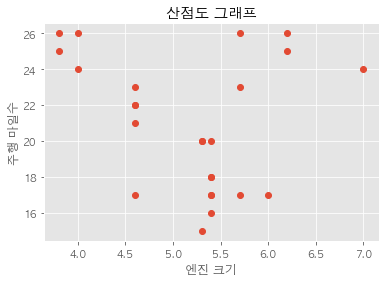

In [37]:
plt.figure()
plt.plot(xdata, ydata, marker='o', linestyle='None' )
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일수")
plt.title("산점도 그래프")
plt.grid(True)

In [13]:
mycolors = ['r', 'g', 'b'] # 항목을 구분한 색상 리스트

In [14]:
# 해당 구동 방식을 한글 이름으로 변경하기 위한 사전
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜 구동'}

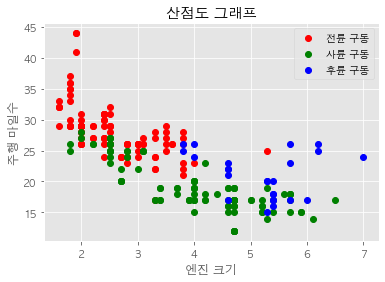

In [15]:
plt.figure()

idx = 0 # 색상 구분을 위한 카운터 변수
labels = mpg['drv'].unique() # ['f' '4' 'r']

for finditem in labels:
    xdata = mpg.loc[mpg['drv'] == finditem, 'displ']
    ydata = mpg.loc[mpg['drv'] == finditem, 'hwy']
    plt.plot(xdata, ydata, color=mycolors[idx], marker='o', linestyle='None', label=label_dict[finditem])
    idx += 1

plt.legend()
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일수")
plt.title("산점도 그래프")
plt.grid(True)

In [16]:
import seaborn as sns

seabornTest_01.png 파일이 저장되었습니다.


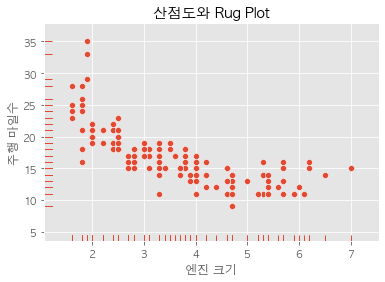

In [17]:
ax = plt.subplots()
sns.scatterplot(data=mpg, x='displ', y='cty')
ax = sns.rugplot(data=mpg, x='displ', y='cty')
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일수')
FileSave()

seabornTest_02.png 파일이 저장되었습니다.


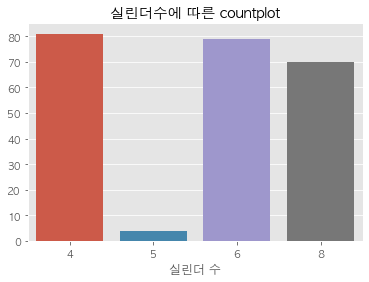

In [18]:
plt.figure()
ax = sns.countplot(x="cyl", data=mpg)
ax.set_title('실린더수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')
FileSave()

seabornTest_03.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

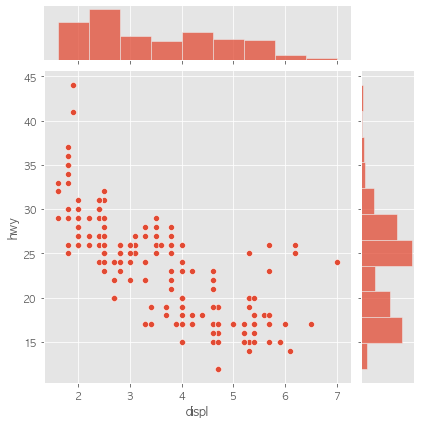

In [19]:
plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg)
FileSave()

seabornTest_04.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

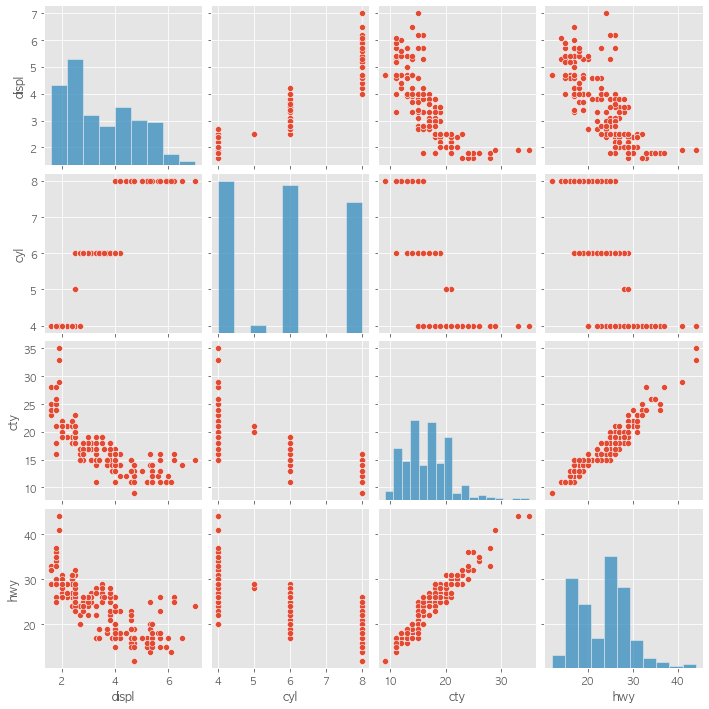

In [20]:
plt.figure()
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]
ax = sns.pairplot(data=newmpg)
FileSave()

seabornTest_05.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

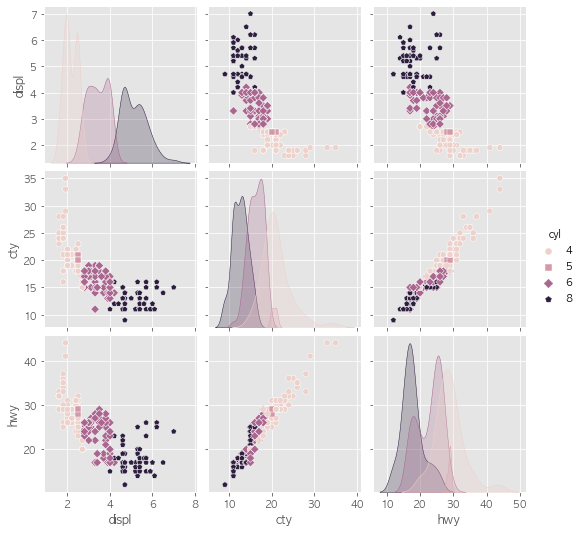

In [21]:
plt.figure()
ax = sns.pairplot(data=newmpg, hue="cyl", markers=["o", "s", "D", "p"])
FileSave()

In [22]:
mpg_size = mpg.pivot_table(
    index="drv", columns="cyl", aggfunc="size", fill_value=0)
print('mpg_size')
print(mpg_size)

mpg_size
cyl   4  5   6   8
drv               
4    23  0  32  48
f    58  4  43   1
r     0  0   4  21


seabornTest_06.png 파일이 저장되었습니다.


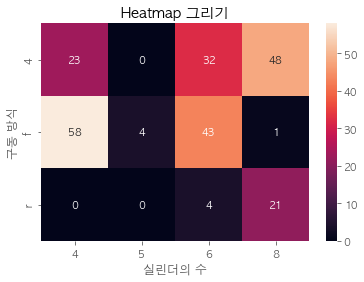

In [23]:
plt.figure()
# ax = sns.heatmap(mpg_size, annot=True, fmt="d")
ax = sns.heatmap(mpg_size, annot=True, fmt=".2g")
ax.set_title('Heatmap 그리기')
ax.set_xlabel('실린더의 수')
ax.set_ylabel('구동 방식')
FileSave()

In [24]:
print('구동 방식에 따른 주행 마일수의 통계치 정보')
mygrouping = mpg.groupby('drv')['hwy']
print(mygrouping.describe())

구동 방식에 따른 주행 마일수의 통계치 정보
     count       mean       std   min   25%   50%   75%   max
drv                                                          
4    103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f    106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r     25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0


seabornTest_07.png 파일이 저장되었습니다.


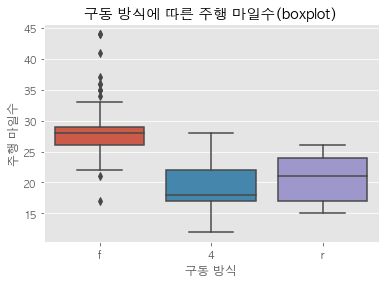

In [25]:
plt.figure()
ax = sns.boxplot(x='drv', y='hwy', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
FileSave()

seabornTest_08.png 파일이 저장되었습니다.


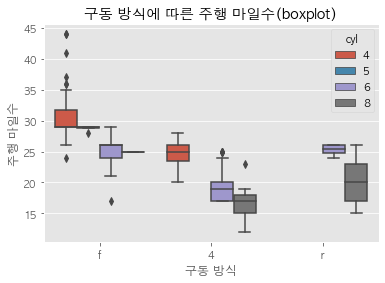

In [26]:
plt.figure()
ax = sns.boxplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
FileSave()

seabornTest_09.png 파일이 저장되었습니다.


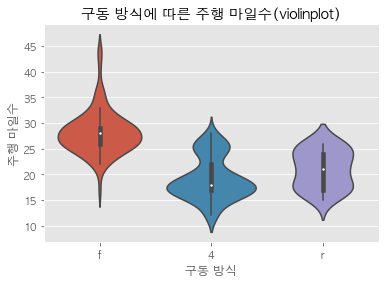

In [27]:
plt.figure()
ax = sns.violinplot(x='drv', y='hwy', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(violinplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
FileSave()

seabornTest_10.png 파일이 저장되었습니다.


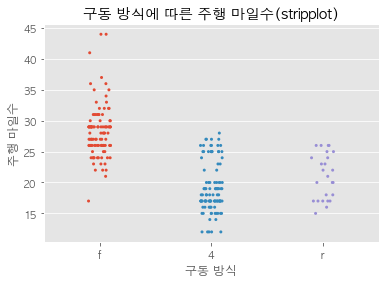

In [28]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
FileSave()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


seabornTest_11.png 파일이 저장되었습니다.


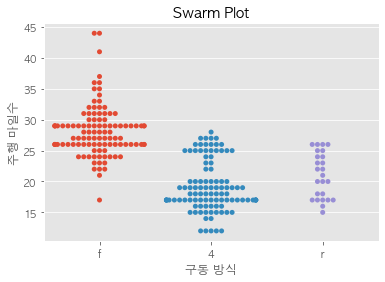

In [29]:
plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', data=mpg)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
FileSave()

In [30]:
import squarify

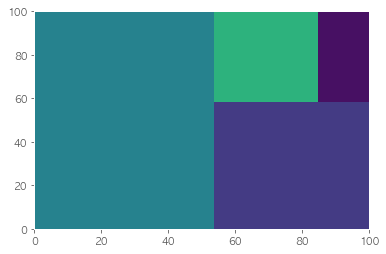

In [31]:
sizes = [50, 25, 12, 6]
squarify.plot(sizes)
plt.show()

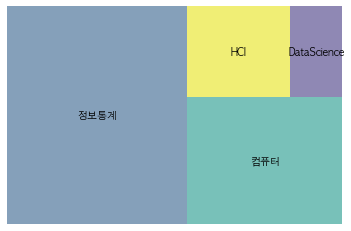

In [32]:
sizes=[50, 25, 12, 6]
label=["정보통계", "컴퓨터", "HCI", "DataScience"]
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis('off')
plt.show()

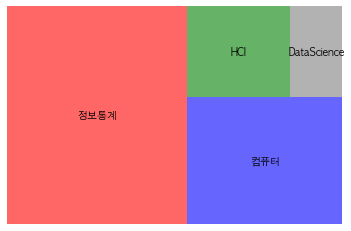

In [33]:
sizes=[50, 25, 12, 6]
label=["정보통계", "컴퓨터", "HCI", "DataScience"]
color=['red','blue','green','grey']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6 )
plt.axis('off')
plt.show()

In [34]:
url = "https://s3-eu-west-1.amazonaws.com/data.defra.gov.uk/AnimalWelfare/animal-population-by-breed-on_1-march-2010.csv"
df = pd.read_csv(url)
df['Number of Animals'] = pd.to_numeric(df['Number of Animals'], errors='coerce')
df.dropna(inplace=True)
df.head()

,Breed,Number of Animals
0,ABERDEEN ANGUS,147047.0
1,ABERDEEN ANGUS X,516932.0
2,ANGLER ROTVIEH,38.0
3,ANGLER ROTVIEH X,38.0
4,ANKOLE,10.0


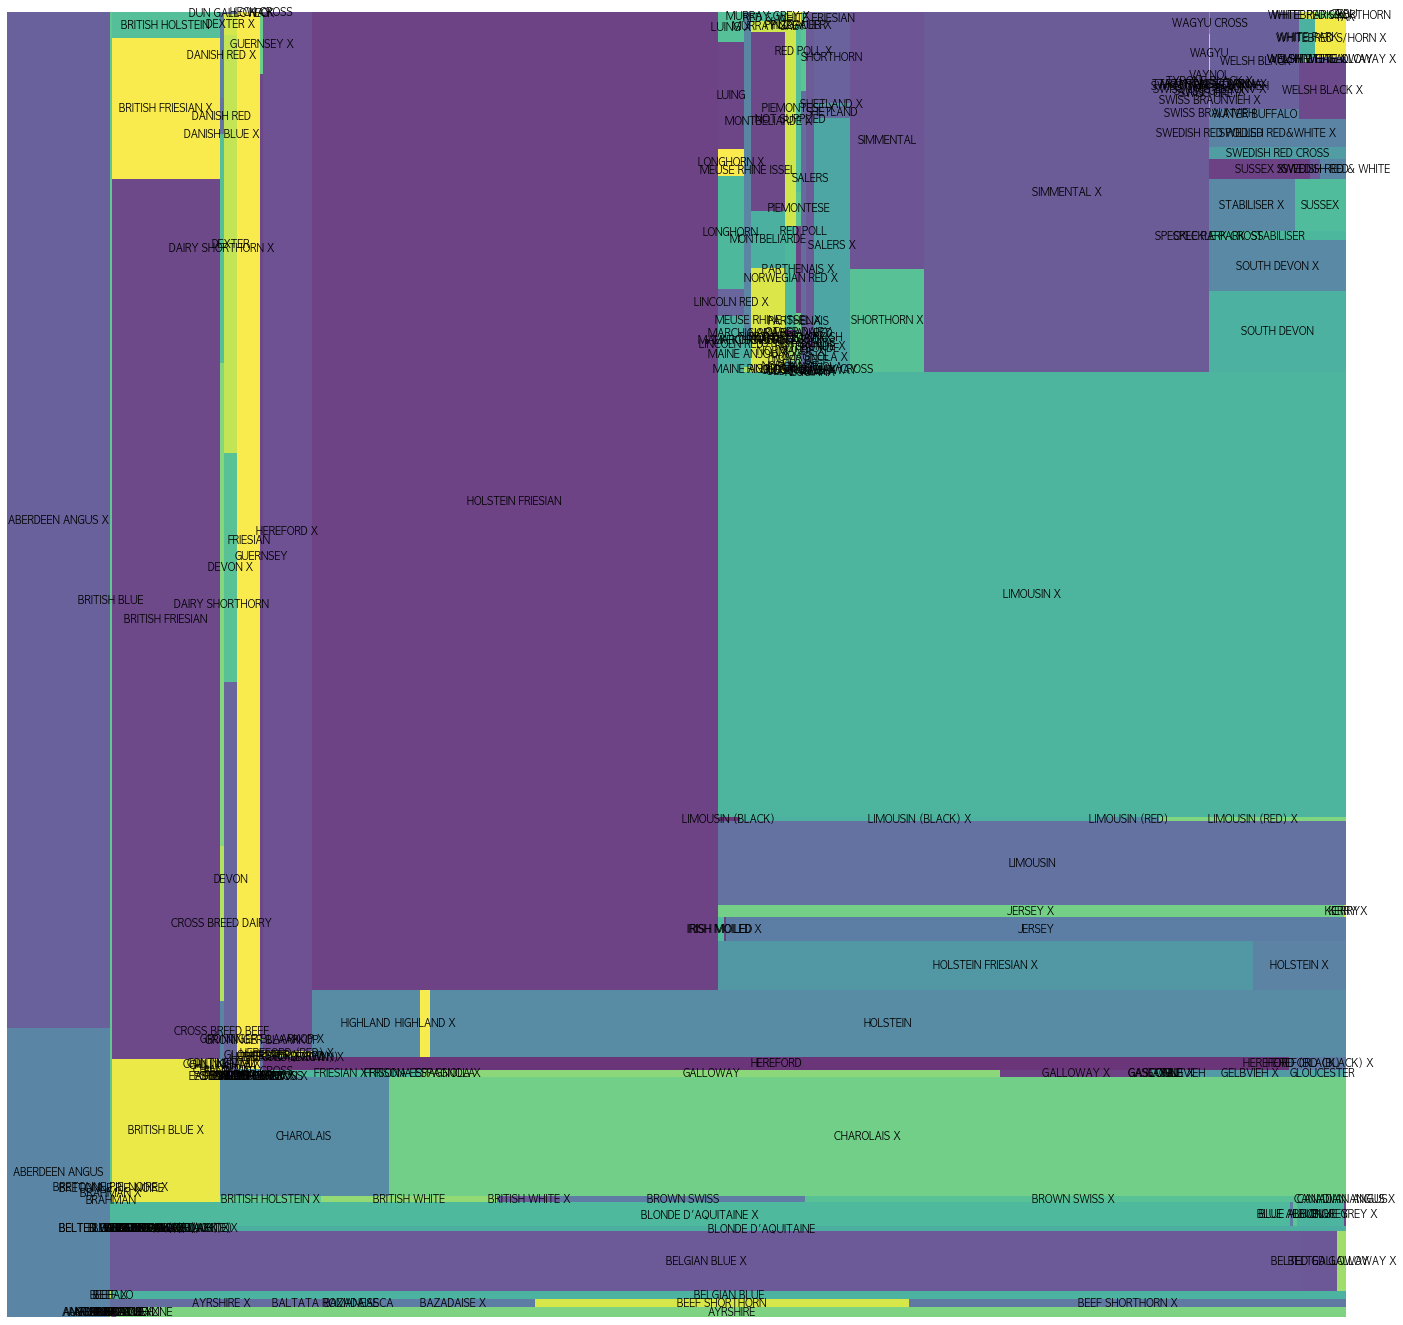

In [35]:
fig, ax = plt.subplots(1, figsize = (24,24))
squarify.plot(sizes=df['Number of Animals'],
              label=df['Breed'],
              alpha=.8 )
plt.axis('off')
plt.show()

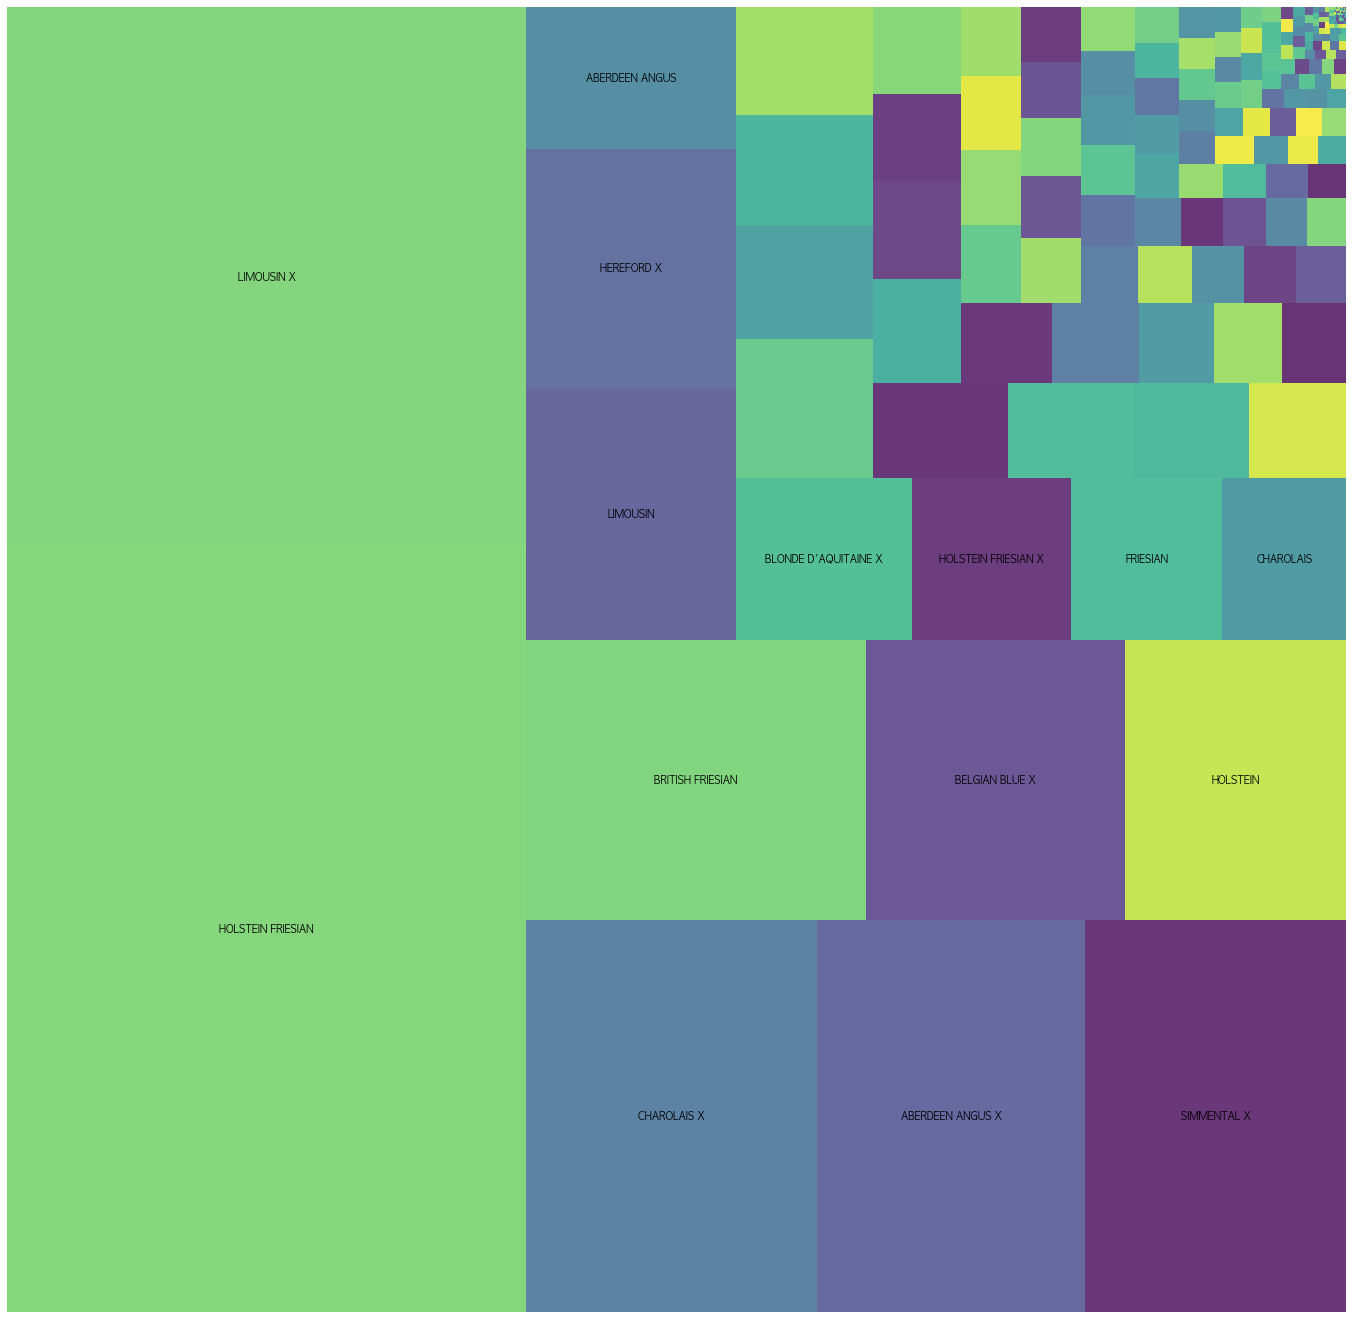

In [36]:
df.sort_values('Number of Animals', ascending=False, inplace=True)
fig, ax = plt.subplots(1, figsize = (24,24))
squarify.plot(sizes=df['Number of Animals'], 
              label=df['Breed'][:15], 
              alpha=.8 )
plt.axis('off')
plt.show()